In [ ]:
!pip install river==0.7.0

In [ ]:
!pip install memory-profiler

In [ ]:
!pip install optunity

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from river import metrics
from river import stream
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/traffic/word2vec_embeddings_3.csv")
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,class
0,-0.282402,0.266967,0.065208,-0.028991,-0.007023,-0.771427,0.232273,1.207871,-0.591220,-0.309825,...,0.042316,0.310536,0.162041,0.959328,0.440757,0.254530,-0.369880,0.145212,-0.116297,1
1,-0.291088,0.254678,0.064866,-0.057217,-0.062241,-0.777611,0.250659,1.273771,-0.543295,-0.394929,...,0.054725,0.335485,0.092124,0.927354,0.550294,0.228266,-0.344106,0.213569,-0.058613,2
2,-0.261362,0.254425,0.068230,-0.053486,-0.033278,-0.689748,0.213416,1.108689,-0.507155,-0.327768,...,0.065789,0.280096,0.091490,0.850703,0.469683,0.221899,-0.304451,0.158464,-0.077235,1
3,-0.286113,0.391083,0.128172,-0.073136,-0.001999,-0.815213,0.267318,1.340139,-0.703260,-0.387489,...,0.132497,0.319347,0.131601,1.123702,0.524509,0.338532,-0.356903,0.165753,-0.152370,1
4,-0.245734,0.306324,0.101826,-0.071761,-0.020645,-0.699376,0.215515,1.146781,-0.553634,-0.339269,...,0.098094,0.289700,0.093295,0.920155,0.471642,0.250729,-0.294243,0.149158,-0.102090,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.313844,0.486717,0.127441,-0.110789,0.055357,-0.805933,0.282415,1.324012,-0.717741,-0.391278,...,0.213904,0.239798,0.090951,1.214346,0.529893,0.353217,-0.366810,0.117098,-0.188485,2
2996,-0.229370,0.246962,0.072126,-0.027051,-0.002868,-0.601071,0.194752,0.948708,-0.492534,-0.247602,...,0.043127,0.236235,0.106006,0.782842,0.347924,0.208732,-0.286824,0.131814,-0.094364,0
2997,-0.274848,0.296477,0.080733,-0.048536,-0.009738,-0.724364,0.234730,1.157373,-0.573305,-0.327971,...,0.070327,0.281320,0.104546,0.930048,0.461124,0.246414,-0.334507,0.162923,-0.096177,1
2998,-0.233363,0.249164,0.077844,-0.003231,-0.005001,-0.643630,0.205270,0.995505,-0.540571,-0.240271,...,0.018829,0.256943,0.133459,0.824737,0.344565,0.220645,-0.314877,0.141798,-0.104880,0


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.43, test_size = 0.57, shuffle=False, random_state = 0)

In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1290,-0.310050,0.300677,0.065016,-0.133605,-0.059403,-0.785804,0.272863,1.335785,-0.513274,-0.482336,...,0.816608,0.139094,0.327774,0.016366,0.961914,0.668297,0.239355,-0.318937,0.234278,-0.049346
1291,-0.193624,0.229374,0.064823,-0.041480,0.004520,-0.499604,0.165664,0.797643,-0.405902,-0.230950,...,0.482289,0.075482,0.179946,0.066667,0.664483,0.325413,0.185891,-0.223929,0.099935,-0.071775
1292,-0.286824,0.277615,0.061399,-0.131799,-0.061133,-0.741754,0.254120,1.270901,-0.478833,-0.464455,...,0.783563,0.134182,0.314118,0.011466,0.906982,0.641650,0.224346,-0.292937,0.226338,-0.045792
1293,-0.242502,0.291384,0.085841,-0.013633,0.013289,-0.648230,0.213737,1.004601,-0.563222,-0.242409,...,0.577940,0.044770,0.243683,0.129756,0.874645,0.339446,0.240016,-0.323188,0.130466,-0.125732
1294,-0.264546,0.488745,0.164198,-0.102889,0.034595,-0.791486,0.275773,1.331881,-0.763387,-0.389827,...,0.910092,0.210673,0.280192,0.124670,1.224776,0.513853,0.407311,-0.326990,0.125790,-0.219279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.313844,0.486717,0.127441,-0.110789,0.055357,-0.805933,0.282415,1.324012,-0.717741,-0.391278,...,0.854515,0.213904,0.239798,0.090951,1.214346,0.529893,0.353217,-0.366810,0.117098,-0.188485
2996,-0.229370,0.246962,0.072126,-0.027051,-0.002868,-0.601071,0.194752,0.948708,-0.492534,-0.247602,...,0.541247,0.043127,0.236235,0.106006,0.782842,0.347924,0.208732,-0.286824,0.131814,-0.094364
2997,-0.274848,0.296477,0.080733,-0.048536,-0.009738,-0.724364,0.234730,1.157373,-0.573305,-0.327971,...,0.675335,0.070327,0.281320,0.104546,0.930048,0.461124,0.246414,-0.334507,0.162923,-0.096177
2998,-0.233363,0.249164,0.077844,-0.003231,-0.005001,-0.643630,0.205270,0.995505,-0.540571,-0.240271,...,0.560564,0.018829,0.256943,0.133459,0.824737,0.344565,0.220645,-0.314877,0.141798,-0.104880


In [ ]:
%%time
import memory_profiler as mem_profile
m1 = mem_profile.memory_usage()
print('Memory (Before): ' + str(m1[0]) + ' MB' )
classifier = xgb.XGBClassifier(n_estimators = 10)
# classifier = joblib.load('Optimized_lightGBM.pkl')
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_test,predictions)))

m2 = mem_profile.memory_usage()
print('Memory (After) : ' + str(m2[0]) + ' MB')
print('Memory Consumption : ' + str(m2[0]-m1[0]) + ' MB')

Memory (Before): 626.91796875 MB
Accuracy: 0.7508771929824561
Memory (After) : 635.16796875 MB
Memory Consumption : 8.25 MB
CPU times: user 1.11 s, sys: 10.4 ms, total: 1.12 s
Wall time: 2.28 s


In [ ]:
import time
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

# a: warining threshold, b: drift threshold, win1: sliding window size, win2: adaptive window max size
def oasw_bo(params):

    a=abs(float(params['a']))
    b=abs(float(params['b']))
    win1=int(params['win1'])
    win2=int(params['win2'])

    i=0
    yt = []
    yp = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]

    metric = metrics.Accuracy()

    classifier = xgb.XGBClassifier(n_estimators = 10) # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    for j in range(1290,3000):
        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric

        # Store the y_test, y_pred, and x_test
        yt.append(yi)
        yp.append(y_pred)

        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                    else:
                        classifier.fit(x_new,y_new)
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)
            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1
    score=metric.get()
    print(str(a)+" "+str(b)+" "+str(win1)+" "+str(win2)+" "+str(score)) # Output the hyperparameter values and corresponding accuracy
    return {'loss': -score, 'status': STATUS_OK }

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
space = {
    'a': hp.quniform('a', 0.75, 0.99, 0.001),
    'b': hp.quniform('b', 0.70, 0.98, 0.001),
    'win1': hp.quniform('win1', 200, 1500, 10),
    'win2': hp.quniform('win2', 700, 3000, 10),
}

t1=time.time()
best = fmin(fn=oasw_bo,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print(t2-t1)

0.891 0.935 1490 1580 0.7508771929824561
0.754 0.903 370 2850 0.7508771929824561
0.8220000000000001 0.906 1090 1910 0.7508771929824561
0.8240000000000001 0.9560000000000001 1390 2730 0.7508771929824561
0.902 0.73 540 2710 0.7508771929824561
0.93 0.706 460 870 0.7508771929824561
0.874 0.908 1290 2450 0.7508771929824561
0.763 0.965 1340 2610 0.7508771929824561
0.798 0.791 1350 1770 0.7508771929824561
0.9380000000000001 0.776 1350 880 0.7508771929824561
100%|██████████| 10/10 [00:35<00:00,  3.56s/trial, best loss: -0.7508771929824561]
Hyperopt estimated optimum {'a': 0.891, 'b': 0.935, 'win1': 1490.0, 'win2': 1580.0}
35.583800077438354


In [ ]:
def oasw(a=0.99, b=0.95, win1=200, win2=1000):
    a = round(a, 3)
    b = round(b, 3)
    win1 = round(win1)
    win2 = round(win2)

    i=0
    yt = []
    yp = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]

    metric = metrics.Accuracy()

    classifier = xgb.XGBClassifier(n_estimators = 10) # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    for j in range(1290,3000):

        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric

        # Store the y_test, y_pred, and x_test
        yt.append(yi)
        yp.append(y_pred)
        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                    else:
                        classifier.fit(x_new,y_new)
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)
            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1
    score=metric.get()
    print(str(a)+" "+str(b)+" "+str(win1)+" "+str(win2)+" "+str(score)) # Output the hyperparameter values and corresponding accuracy
    return score

In [ ]:
import optunity
import optunity.metrics

search = {
    'a': [0.75,0.99],
    'b': [0.75,0.98],
    'win1': [200,1000],
    'win2': [1000,5000],
         }

optimal_configuration, info, _ = optunity.maximize(oasw,
                                                  solver_name='particle swarm',
                                                  num_evals=50,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

0.919 0.919 409 4107 0.7508771929824561
0.979 0.862 209 1107 0.7508771929824561
0.859 0.977 609 3107 0.7508771929824561
0.829 0.833 509 2607 0.7508771929824561
0.949 0.948 909 4607 0.7508771929824561
0.889 0.776 709 1607 0.7508771929824561
0.769 0.891 309 3607 0.7508771929824561
0.776 0.769 434 3482 0.7508771929824561
0.896 0.884 834 1482 0.7508771929824561
0.956 0.826 634 4482 0.7508771929824561
0.944 0.907 303 4358 0.7508771929824561
0.892 0.945 655 3591 0.7508771929824561
0.862 0.865 397 2749 0.7508771929824561
0.915 0.941 797 4802 0.7508771929824561
0.922 0.808 666 2167 0.7508771929824561
0.802 0.883 421 3590 0.7508771929824561
0.81 0.801 468 4042 0.7508771929824561
0.875 0.889 722 2042 0.7508771929824561
0.923 0.858 522 4117 0.7508771929824561
0.936 0.917 333 4514 0.7508771929824561
0.926 0.913 543 4151 0.7508771929824561
0.896 0.898 300 3309 0.7508771929824561
0.888 0.909 685 4698 0.7508771929824561
0.949 0.84 554 2727 0.7508771929824561
0.836 0.915 525 3645 0.7508771929824561
0.

In [ ]:
# Define OASW with a figure
def oasw_plot(a=0.99, b=0.95, win1=200, win2=1000):
    a = round(a, 3)
    b = round(b, 3)
    win1 = round(win1)
    win2 = round(win2)

    metric = metrics.Accuracy()
    metric2 = metrics.Accuracy()

    i = 0
    t = []
    yt = []
    yp = []
    m = []
    m2 = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]
    dri =[0]
    mt =0

    classifier = xgb.XGBClassifier(n_estimators = 10) # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    classifier2 = xgb.XGBClassifier(n_estimators = 10) # Train an offline LightGBM model as a comparison model
    classifier2.fit(X_train,y_train)

    for j in range(1290,3000):
        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric


        y_pred2= classifier2.predict(xi2.reshape(1, -1))
        metric2 = metric2.update(yi, y_pred2[0])

        # Store the y_test, y_pred, x_test, and real-time accuracy
        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred)
        m2.append(metric2.get()*100)
        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    dri.append(i)
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                        mt +=1
                    else:
                        classifier.fit(x_new,y_new)
                        mt+=1
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)

            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            mt+=1
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        mt+=1
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1

    # Plot the accuracy change figure
    plt.rcParams.update({'font.size': 35})
    plt.ion()
    plt.figure(1,figsize=(24,15))
    sns.set_style("darkgrid")
    plt.clf()
    plt.plot(t,m,'-b',label='ASW+XGB, Avg Accuracy: %.2f%%'%(metric.get()*100))
    plt.plot(t,m2,'red',label='Offline XGB, Avg Accuracy: %.2f%%'%(metric2.get()*100))

    #Plot the drift points
    for i in range(len(dr)):
        if i!=0:
            plt.scatter(dr[i],m[dr[i]],s=200,c='r')

    plt.legend(loc='best')
    plt.ylim(10,100)
    #plt.title('NSL-KDD', fontsize=40)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy(%)')

    plt.draw()
    print(dr)
    print(dri)
    print(mt)

[0]
[0]
0


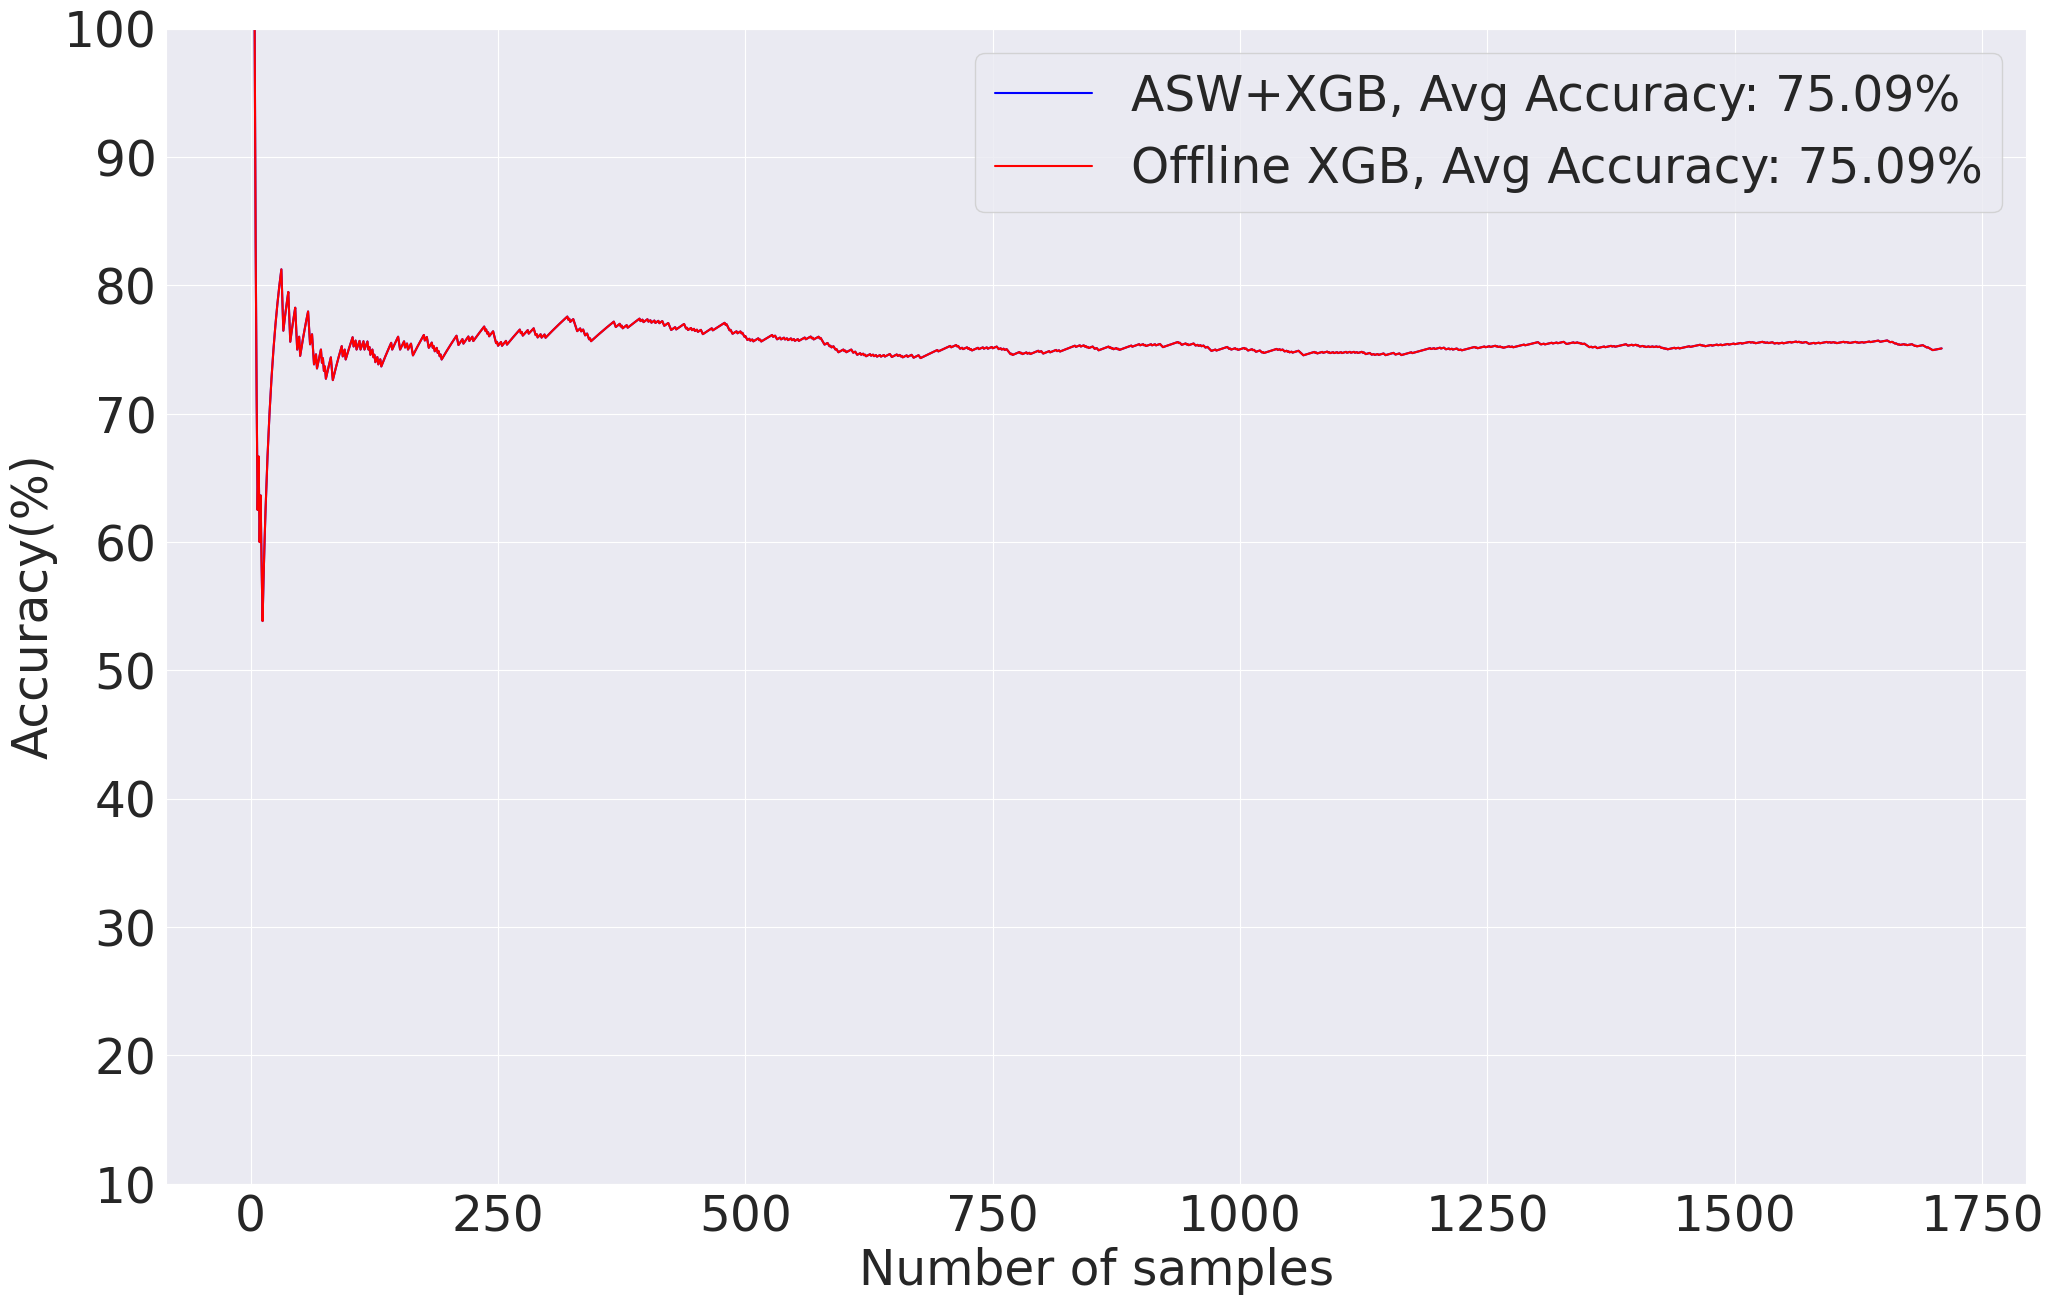

In [ ]:
oasw_plot(a = 0.96720703125, b = 0.9145703125, win1 = 890.234375, win2 = 3201.171875)

[0]
[0]
0


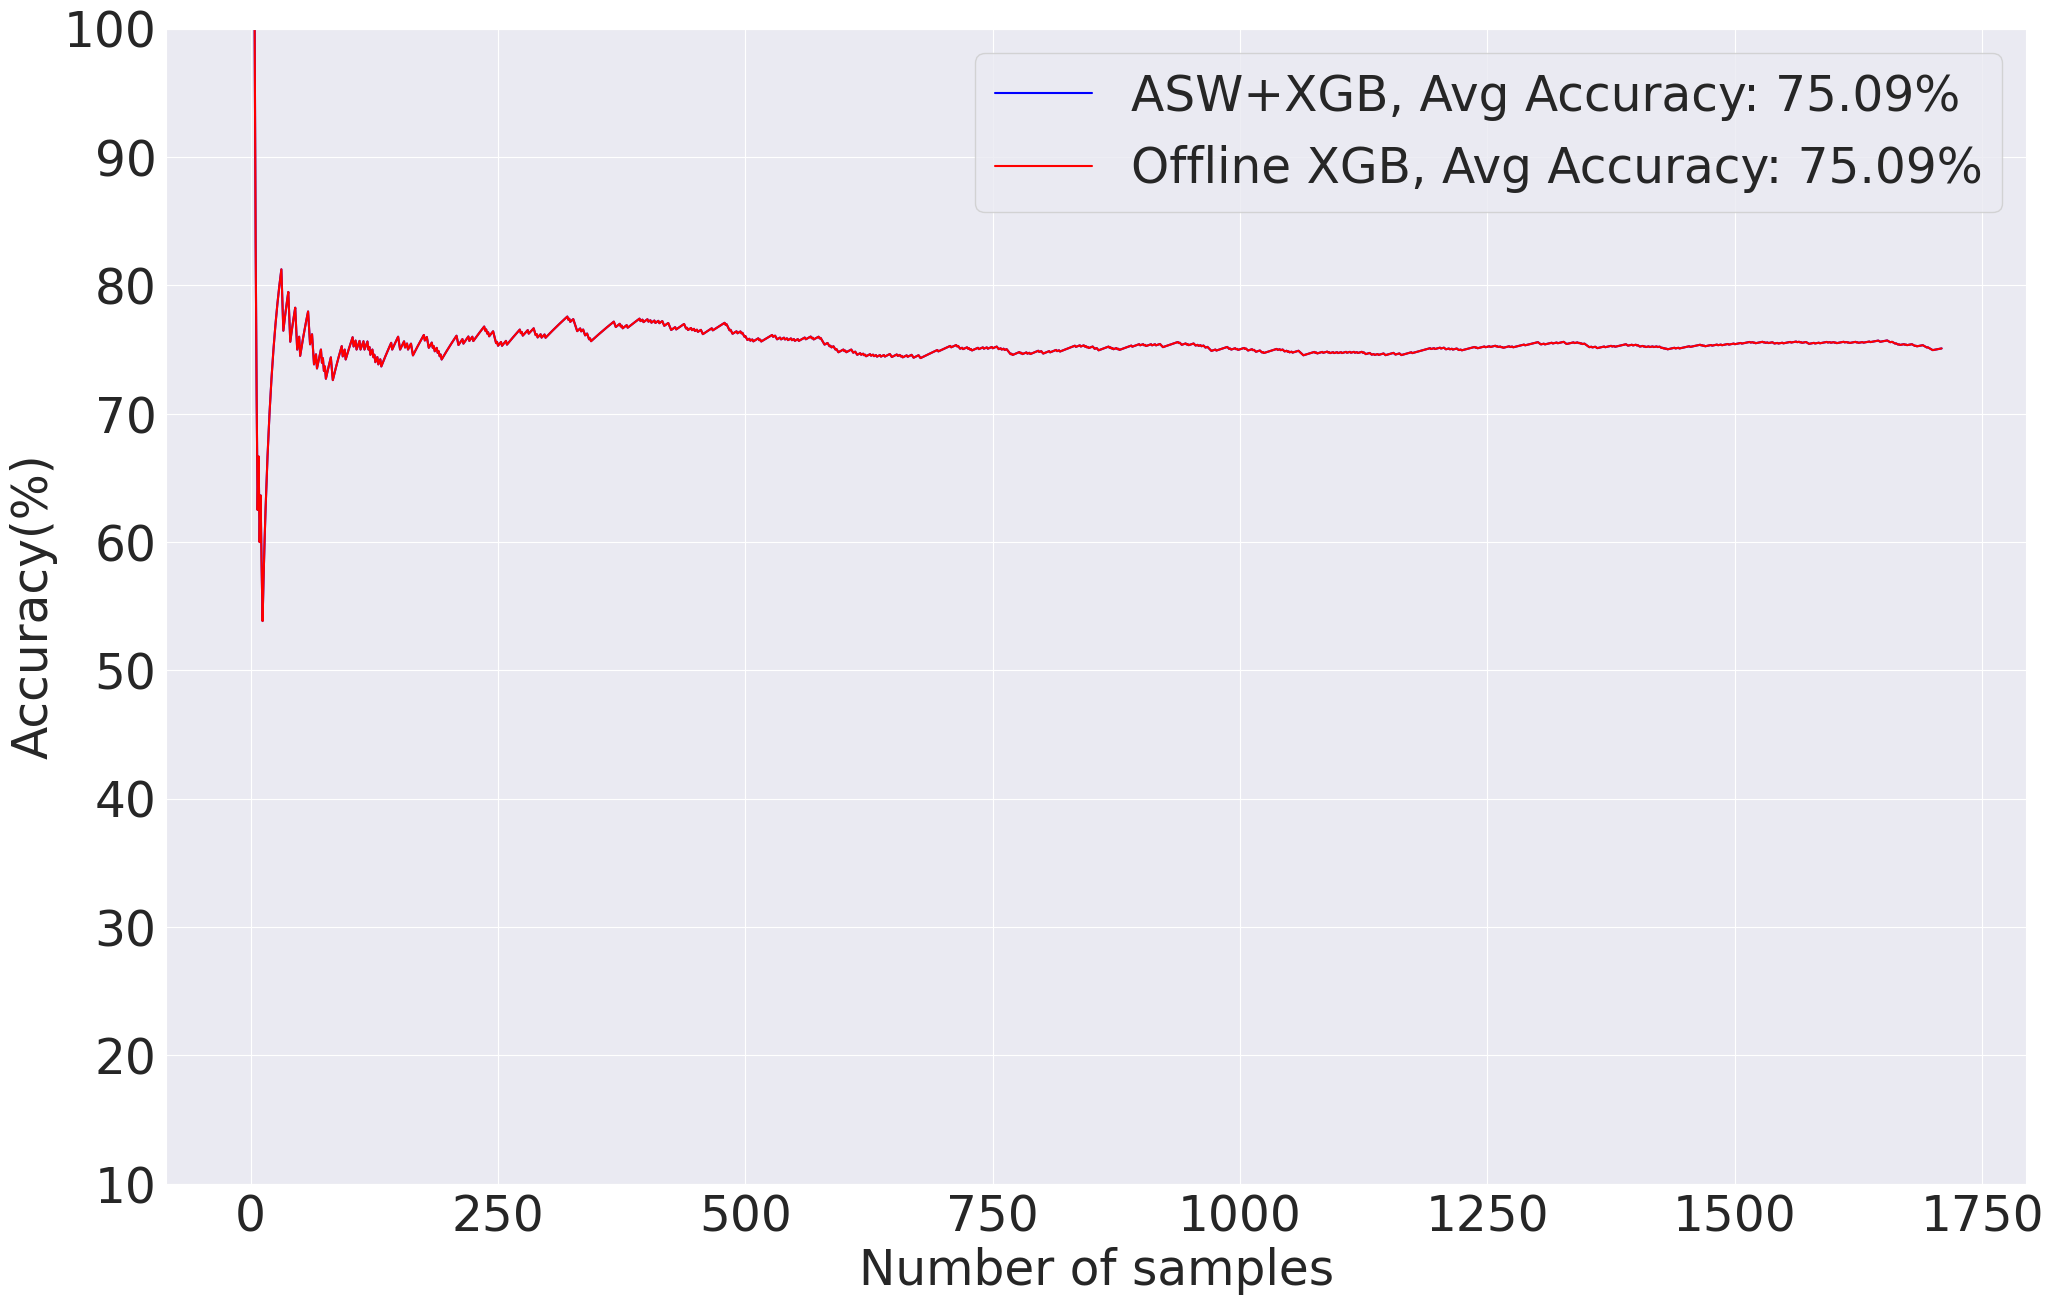

In [ ]:
oasw_plot(a = 0.969, b = 0.932, win1 = 900.0, win2 = 2500.0)